# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Charges are in US dollars.

In [5]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- There are no missing values, this is great!!

### Categorical Features:
- sex
- smoker
- region

In [9]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Data Analysis

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


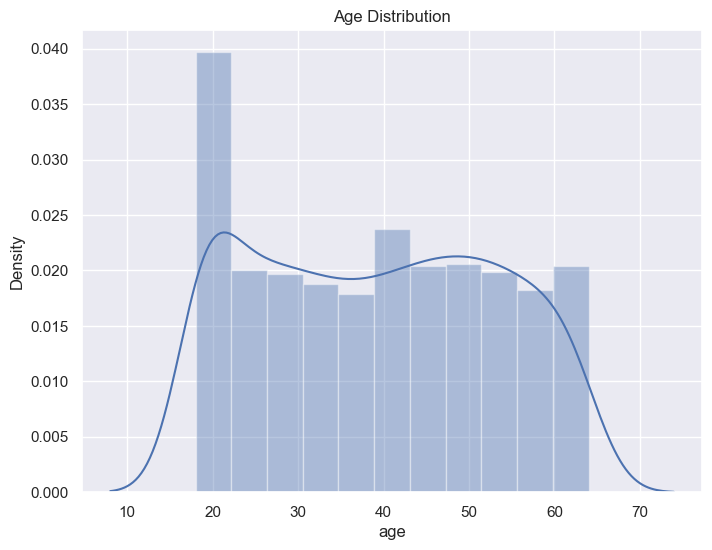

In [13]:
# Distribution of the age value
sns.set()
plt.figure(figsize = (8,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

- Distribution between the ages except beginning 20's are almost the same. There are more peoplein ages between (20-22) in the dataset.

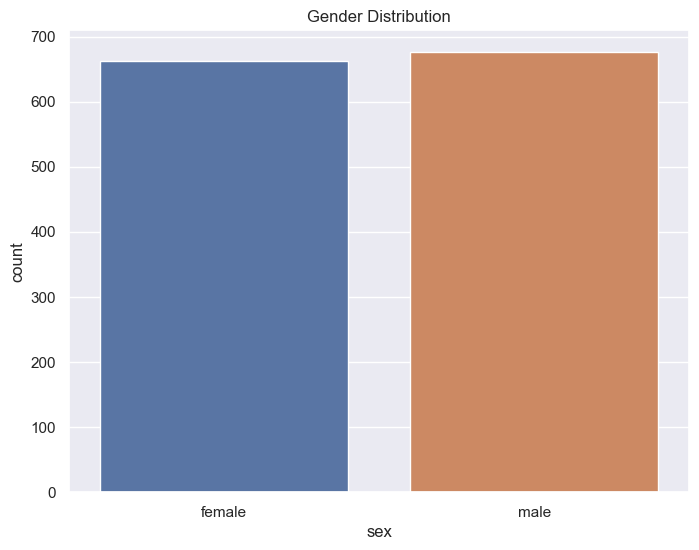

In [14]:
# Gender column
sns.set()
plt.figure(figsize = (8,6))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

- Two categorie's distribution is almost identical

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


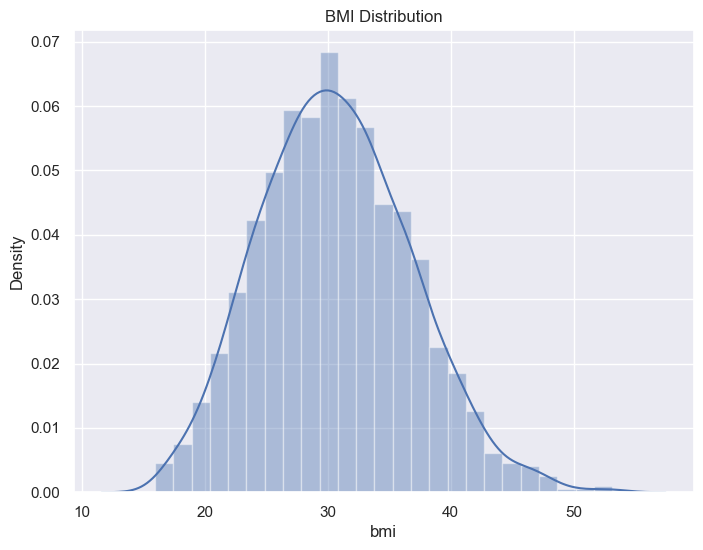

In [16]:
# BMI column
sns.set()
plt.figure(figsize = (8,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

- The values in the BMI column are normally distributed.
- Normal BMI Range --> 18.5 to 24.9
- So we can say that lot of people in this dataset are **overweight**


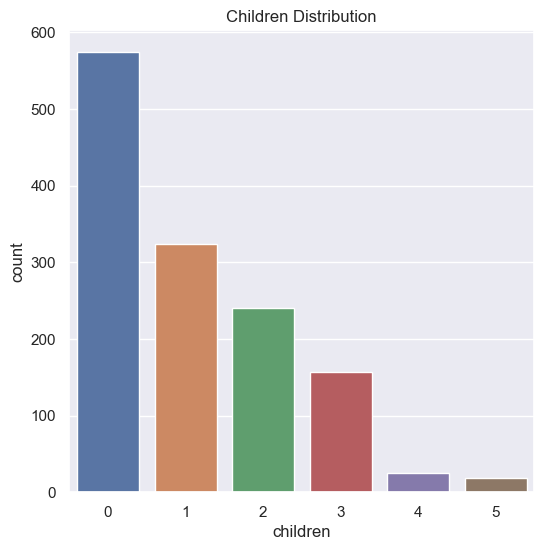

In [18]:
# Children column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.show()

In [19]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

- We can definetly say that children column has right skewed distribution.

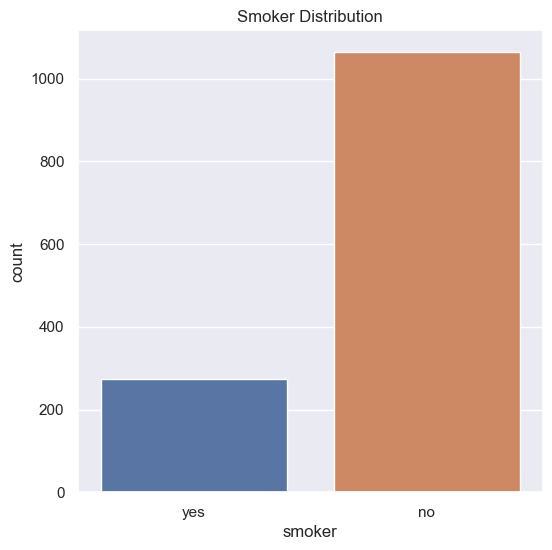

In [20]:
# Smoker column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

In [21]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

- There are definetly more people who isn't a smoker.

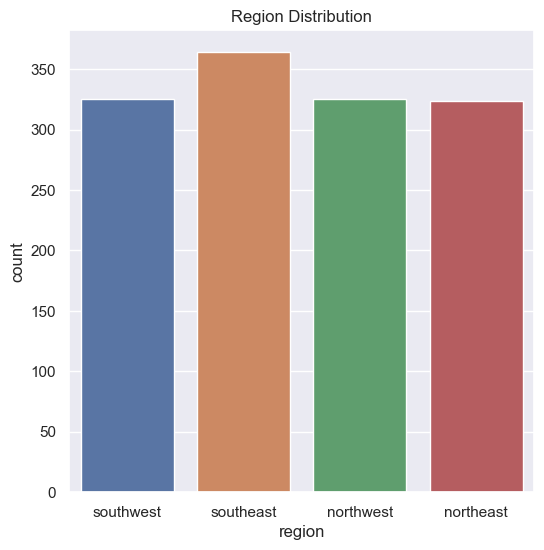

In [22]:
# region column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.show()

- Data is almost similar for all distributions.

In [23]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


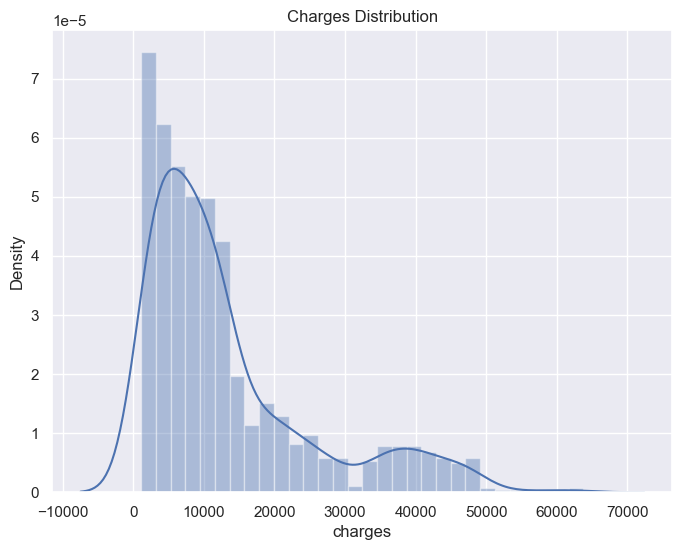

In [24]:
# Charges column
sns.set()
plt.figure(figsize = (8,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Preprocessing

- Encoding the categorical features

In [25]:
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [27]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


## Splitting the Features and Target

In [28]:
X = df.drop(columns='charges', axis = 1)
Y = df['charges']

In [29]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [30]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting the data into Training data & Testing data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training
- Linear Regression

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [35]:
# prediction on the training data
training_data_pred = reg.predict(X_train)

In [36]:
# R squared value 
r2_train = metrics.r2_score(Y_train, training_data_pred)
print('R squared value :', r2_train)

R squared value : 0.751505643411174


In [37]:
# prediction on the testing data
testing_data_pred = reg.predict(X_test)

In [38]:
# R squared value 
r2_test = metrics.r2_score(Y_test, testing_data_pred)
print('R squared value :', r2_test)

R squared value : 0.7447273869684077


### Seams like model learned well

# Building a Predictive System

In [41]:
# Age = 31
# Sex = female
# BMI = 25.74
# Children = 0
# Smoker = no
# Region = southeast

input_data = (31,1,25.74,0,1,0) 

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print('The insurance cost is USD', prediction[0])

The insurance cost is USD 3760.080576496048


c:\Users\Muhittin Arslan\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Model found 3760.0806 the real value was 3756.6216 (it is the values in the 6th row).
### So model works like expected!! 